### --------------------------- Diabetes Prediction with Support Vector Machine (SVM) algorithm ----------------------------- 

In [123]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [124]:
dt = pd.read_csv("diabetes.csv")
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [125]:
dt.shape

(768, 9)

In [126]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [127]:
dt["Outcome"].value_counts()
#  1 --> diabetic
#  0 --> non-diabetic

0    500
1    268
Name: Outcome, dtype: int64

In [128]:
# separating the data and labels
X = dt.drop(columns="Outcome",axis=1)
Y = dt["Outcome"]

# Control
print("X : ",X)
print("\nY : ",Y)

X :       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   

###### Data Standardization

In [129]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


###### Train/Test Split

In [130]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=42)

###### Training the Model

In [132]:
classifier = svm.SVC(kernel="linear")
classifier.fit(x_train,y_train)

## accuracy
pred = classifier.predict(x_test)
acc = accuracy_score(y_test,pred)

print("Accuracy score of the test data : \n",acc)

Accuracy score of the test data : 
 0.7207792207792207


### ----------------------------- House Price Prediction with XGBoost algorithm -----------------------------

In [3]:
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.datasets import fetch_california_housing
from xgboost import XGBRegressor

In [37]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [39]:
print(housing.feature_names[0:6])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [45]:
df = pd.DataFrame(housing.data,columns=housing.feature_names)

In [46]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [47]:
df["price"] = housing.target

In [48]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [49]:
df.shape

(20640, 9)

In [50]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [51]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<AxesSubplot:>

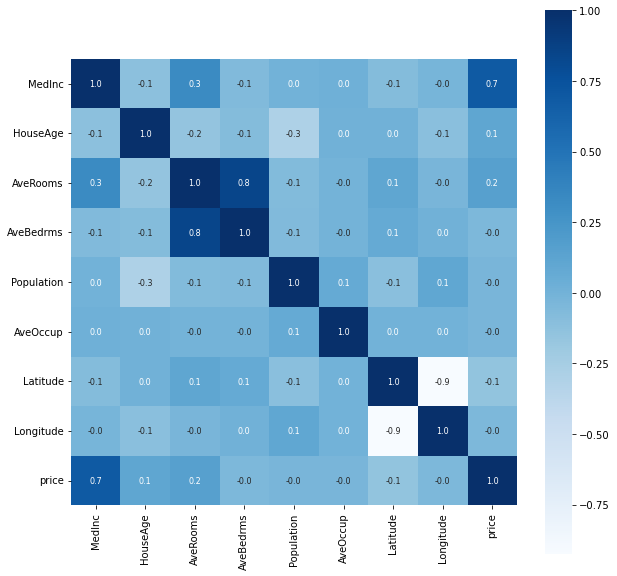

In [53]:
plt.figure(figsize=(10,10))
sbn.heatmap(df.corr(),cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [65]:
X = df.drop(columns="price",axis=1)
Y = df["price"]

In [66]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(X,Y, test_size=0.2,random_state=42)

In [67]:
print(X.shape, x_train1.shape, x_test1.shape)

(20640, 8) (16512, 8) (4128, 8)


In [71]:
model = XGBRegressor()
model.fit(x_train1,y_train1)

pred = model.predict(x_test1)

# R squared error
score_1 = metrics.r2_score(y_test1, pred)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test1, pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8301370561019205
Mean Absolute Error :  0.30957335413783094


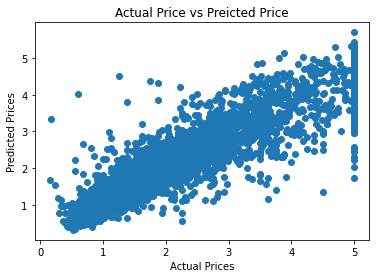

In [73]:
plt.scatter(y_test1, pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

### ----------------------------- Gold Price Prediction with Random Forest -----------------------------

In [1]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
df = pd.read_csv("gld_price_data.csv")

In [21]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [22]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

C:\Users\menes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

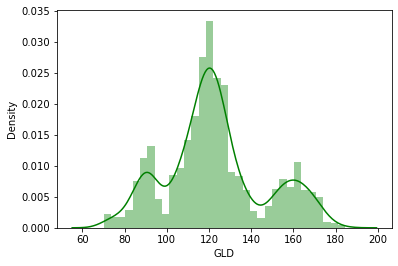

In [23]:
sbn.distplot(df['GLD'],color='green')

In [24]:
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [25]:
X = df.drop(['Date','GLD'],axis=1)
Y = df["GLD"]

In [26]:
x_train2 , x_test2, y_train2, y_test2 = train_test_split(X,Y,train_size=0.8,random_state=42)

In [27]:
RF = RandomForestRegressor(n_estimators=100)

RF.fit(x_train2,y_train2)

pred = RF.predict(x_test2)

# R squared error
Rscore = metrics.r2_score(y_test2, pred)
print("R squared error : ", Rscore)

R squared error :  0.9904648556960399


### ----------------------------- Customer Segmentation using K-Means Clustering -----------------------------

In [32]:
from sklearn.cluster import KMeans

In [33]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [34]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
X = data.iloc[:,[3,4]].values

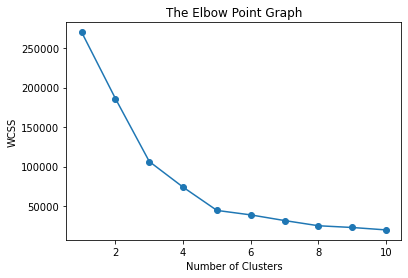

In [59]:
from scipy.cluster.vq import kmeans, vq

X = np.asarray(X, dtype=float)

# WCSS elbow method
wcss = []

for i in range(1, 11):
    centroids, _ = kmeans(X, i)
    idx, _ = vq(X, centroids)
    wcss.append(np.sum((X - centroids[idx]) ** 2))

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# i encounter a problem related to sklearn library, so i use scipy library

In [62]:
# k = 5 optimum number 

In [63]:
num_clusters = 5
centroids, _ = kmeans(X, num_clusters)

labels, _ = vq(X, centroids)

print(labels)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 3 2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


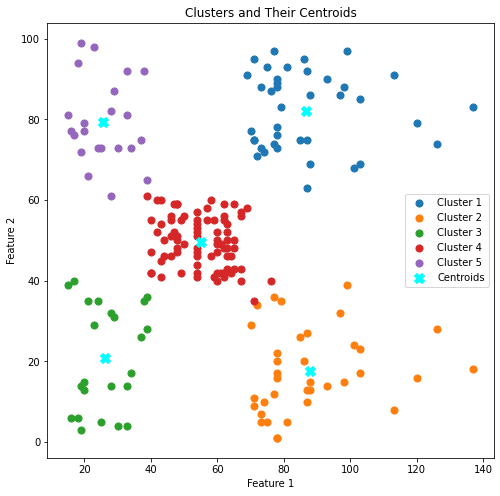

In [65]:
plt.figure(figsize=(8, 8))
for i in range(num_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='cyan', label='Centroids', marker='X')

plt.title('Clusters and Their Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import rand_score
rand_idx = rand_score(data.iloc[:,-1], labels)
print(f'Rand Index: {rand_idx}')

from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print(f'Silhouette Score: {score}')


Rand Index: 0.7549748743718593
Silhouette Score: 0.5532176107575425


In [71]:
## A high rand index indicates clusters that are consistent with the true labels.

### ----------------------------- Heart Disease Prediction with Logistic Reg -----------------------------

In [72]:
from sklearn.linear_model import LogisticRegression

In [110]:
heartDt = pd.read_csv("heart_disease_data.csv")
heartDt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [111]:
heartDt.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [112]:
heartDt["target"].value_counts()

#  1 --> Defective heart
#  0 --> Healthy heart

1    165
0    138
Name: target, dtype: int64

In [113]:
X = heartDt.drop(columns='target', axis=1)
Y = heartDt['target']

In [114]:
x_trainh, x_testh, y_trainh , y_testh = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=4)

In [133]:
scaler = StandardScaler()
x_trainh_scaled = scaler.fit_transform(x_trainh)
x_testh_scaled = scaler.transform(x_testh)

model = LogisticRegression(max_iter=200)
model.fit(x_trainh_scaled, y_trainh)

pred_test = model.predict(x_testh_scaled)

acc_test = accuracy_score(y_testh, pred_test) 
print('Accuracy on Test data:', acc_test)

Accuracy on Test data: 0.8688524590163934
